Hw1, name: Jorge Monzon Diaz, email: jorgemd503@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

The following code finds all values of m and a possible a for m 150-5000, this method is very slow so it is commented out

It has been left in case the user wants a new m and a value, to do so simply run the method. Then:

mar[0] is a list of all m

mar[1] is a list of the first found a for m at the same index

mar[2] is the generated prng list for the m and a value at identical index

to call the ith m/a value and r_n list for those values, 

m=mar[0][i]

a=mar[1][i]

r=mar[2][i]

where i is the same for all

[5.e-324 1.e+000 1.e+000 ... 1.e+000 1.e+000 1.e+000]


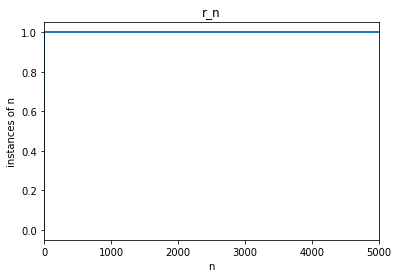

In [2]:
## Problem 1 - Create full period Pseudo-Random Number Generator

m=4999
a=3

r=np.ones(m-1) #intitialize list of length m for r_n
for i in range (1,m-1):
    r[i]=(a * r[i-1]) % m #create list of r_n using formula
instances=np.empty(1) #initialize counter variable for each in n r_n
for x in range(1,len(r)):
    instances=np.append(instances,np.sum(r==x)) #keep count of how many times each n shows up for r_n
print(instances)

plt.plot(r,instances) #plot the number r vs how many times it shows up
plt.xlim([0, 5000]) #change x-range to be the values of r
plt.title('r_n')
plt.xlabel('n')
plt.ylabel('instances of n')
plt.show()

1) Every n of r_n should only show up once, as seen in this graph of instances of n vs n

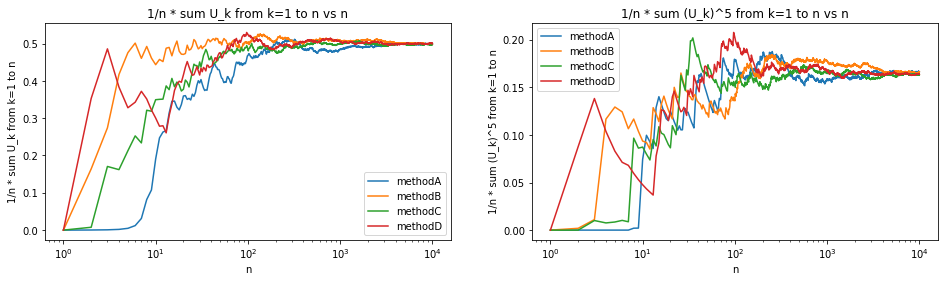

In [3]:
## Problem 2 - Analyze expectation of PRNGs
fig, ax = plt.subplots(1, 2,figsize=(16,4)) #intialize 2 graphs

#create r_n for methodA
m=4999
a=3
r=np.ones(10000) #intitialize list of length 10000 for r_n
for i in range (1,10000):
    r[i]=(a * r[i-1]) % m #create list of r_n using formula

#generate all methods
prngs=loadmat('prngs.mat') #load list of prngs generated in matlab
dt=np.full((10000),4999) #create list of 4999, 10000 times to normalize values of methodA for (0,1)
methodA=np.divide(r,dt) #normalizes values of methodA
methodB=prngs['method1'][0][:10000] #pull first 10000 values of this prng method from matlab data
methodC=prngs['method2'][0][:10000]
methodD=prngs['method3'][0][:10000]

sumA,sumB,sumC,sumD=np.empty(1),np.empty(1),np.empty(1),np.empty(1) #initialize empty lists to store sums
np.append(sumA,methodA[0]),np.append(sumB,methodB[0]),np.append(sumC,methodC[0]),np.append(sumD,methodD[0]) #initial values for U_1
x=np.arange(1,10001)
for i in range(1,len(methodA)):
    sumA=np.append(sumA,(sumA[len(sumA)-1]+methodA[i]))  #generate U_i
    sumB=np.append(sumB,(sumB[len(sumB)-1]+methodB[i]))
    sumC=np.append(sumC,(sumC[len(sumC)-1]+methodC[i]))
    sumD=np.append(sumD,(sumD[len(sumD)-1]+methodD[i]))

ax[0].semilogx(x,sumA/x,label='methodA') #plot n vs 1/n * sum U_i for k=1:n
ax[0].semilogx(x,sumB/x,label='methodB')
ax[0].semilogx(x,sumC/x,label='methodC')
ax[0].semilogx(x,sumD/x,label='methodD')
ax[0].set_title('1/n * sum U_k from k=1 to n vs n')
ax[0].set_ylabel('1/n * sum U_k from k=1 to n')
ax[0].set_xlabel('n')
ax[0].legend()


sumA,sumB,sumC,sumD=np.empty(1),np.empty(1),np.empty(1),np.empty(1) #initialize empty lists to store sums
np.append(sumA,methodA[0]**5),np.append(sumB,methodB[0]**5),np.append(sumC,methodC[0]**5),np.append(sumD,methodD[0]**5) #initial values for (U_1)^5
for i in range(1,len(methodA)):
    sumA=np.append(sumA,(sumA[len(sumA)-1]+methodA[i]**5))  #generate (U_i)^5
    sumB=np.append(sumB,(sumB[len(sumB)-1]+methodB[i]**5))
    sumC=np.append(sumC,(sumC[len(sumC)-1]+methodC[i]**5))
    sumD=np.append(sumD,(sumD[len(sumD)-1]+methodD[i]**5))

ax[1].semilogx(x,sumA/x,label='methodA') #plot n vs 1/n * sum (U_i)^5 for k=1:n
ax[1].semilogx(x,sumB/x,label='methodB')
ax[1].semilogx(x,sumC/x,label='methodC')
ax[1].semilogx(x,sumD/x,label='methodD')
ax[1].set_title('1/n * sum (U_k)^5 from k=1 to n vs n')
ax[1].set_ylabel('1/n * sum (U_k)^5 from k=1 to n')
ax[1].set_xlabel('n')
ax[1].legend()

plt.show()

2) From the law of large numbers, it can be proven that
$$E[U]=1/2, E[U^5]=1/6, E[U^n]=1/(n+1)$$

This is verified by the convergence seen in the graph of 1/2 for E[U] and 1/6 for E[U^5]

Correlation coefficients for methods A, B, C, and D are respectively: 0.3193068405426508; -0.0029300550039871066; -0.06819295946913605; -0.03977360194095719


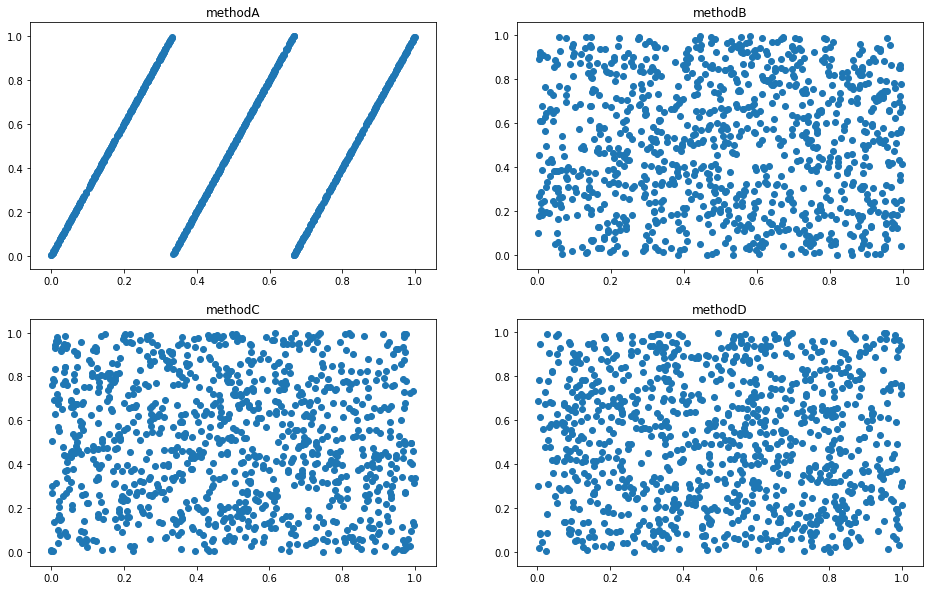

In [4]:
## Problem 3 - Explore Correlation
fig, ax = plt.subplots(2, 2,figsize=(16,10)) #generate 2x2 plots

#create r_n for methodA
m=4999
a=3
r=np.ones(2000)  #intitialize list of length 2000 for r_n
for i in range (1,2000):
    r[i]=(a * r[i-1]) % m #generate r_n

#generate all methods
prngs=loadmat('prngs.mat')
dt=np.full((2000),4999)

methodA=np.divide(r,dt)  #normalizes values of methodA
methodB=prngs['method1'][0][:2000] #pull first 2000 values of this prng method from matlab data
methodC=prngs['method2'][0][:2000]
methodD=prngs['method3'][0][:2000]

#compute correlation coefficient for even and odd values of the index of methodA
pA=np.sum((methodA[::2]-np.mean(methodA[::2]))*(methodA[1::2]-np.mean(methodA[1::2])))/(np.sqrt(np.sum((methodA[::2]-np.mean(methodA[::2]))**2))*np.sqrt(np.sum((methodA[::2]-np.mean(methodA[1::2]))**2)))
pB=np.sum((methodB[::2]-np.mean(methodB[::2]))*(methodB[1::2]-np.mean(methodB[1::2])))/(np.sqrt(np.sum((methodB[::2]-np.mean(methodB[::2]))**2))*np.sqrt(np.sum((methodB[::2]-np.mean(methodB[1::2]))**2)))
pC=np.sum((methodC[::2]-np.mean(methodC[::2]))*(methodC[1::2]-np.mean(methodC[1::2])))/(np.sqrt(np.sum((methodC[::2]-np.mean(methodC[::2]))**2))*np.sqrt(np.sum((methodC[::2]-np.mean(methodC[1::2]))**2)))
pD=np.sum((methodD[::2]-np.mean(methodD[::2]))*(methodD[1::2]-np.mean(methodD[1::2])))/(np.sqrt(np.sum((methodD[::2]-np.mean(methodD[::2]))**2))*np.sqrt(np.sum((methodD[::2]-np.mean(methodD[1::2]))**2)))

print('Correlation coefficients for methods A, B, C, and D are respectively: ' + str(pA) + '; ' + str(pB) + '; ' + str(pC) + '; ' + str(pD))

#plot and title the even vs odd values of all methods
ax[0][0].scatter(methodA[::2],methodA[1::2])
ax[0][0].set_title('methodA')
ax[0][1].scatter(methodB[::2],methodB[1::2])
ax[0][1].set_title('methodB')
ax[1][0].scatter(methodC[::2],methodC[1::2])
ax[1][0].set_title('methodC')
ax[1][1].scatter(methodD[::2],methodD[1::2])
ax[1][1].set_title('methodD')

plt.show()

3) The graph of methodA is an outlier, it is because of the small value for a. If a larger a-value was found, it would look more similar to the other graphs.

Given the small correlation coefficients and scattered data, it can be claimed that all these data sets are independent.

In [5]:
## Problem 4

#create r_n for methodA
m=4999
a=3
r=np.ones(300000) #generate list of size 300000 for r
for i in range (1,300000):
    r[i]=(a * r[i-1]) % m #generate values of r_n

prngs=loadmat('prngs.mat') #load values from matlab prngs
dt=np.full((300000),4999)

methodA=np.divide(r,dt).reshape(30,10000) #rearrange r to be 10000, 30-dimensional, vectors
methodB=prngs['method1'] #import prng values from matlab, already in the correct form
methodC=prngs['method2']
methodD=prngs['method3']

sum=[0,0,0,0] #declare counter variable
for row in range(10000):
    #check the given conditions of each vector value, and if true add one to each respective sum
    if ((methodA[0][row] < 1/4) and (methodA[15][row]>1/4) and (methodA[15][row]<1/2) and (methodA[27][row]>1/2)):
        sum[0] += 1
    if ((methodB[0][row] < 1/4) and (methodB[15][row]>1/4) and (methodB[15][row]<1/2) and (methodB[27][row]>1/2)):
        sum[1] += 1
    if ((methodC[0][row] < 1/4) and (methodC[15][row]>1/4) and (methodC[15][row]<1/2) and (methodC[27][row]>1/2)):
        sum[2] += 1
    if ((methodD[0][row] < 1/4) and (methodD[15][row]>1/4) and (methodD[15][row]<1/2) and (methodD[27][row]>1/2)):
        sum[3] += 1

#compute the occurence of the condition occuring out of 10000 times (its probability)
print(sum[0]/10000,sum[1]/10000,sum[2]/10000,sum[3]/10000)



0.0316 0.0314 0.0 0.0337


4a)

$$P(V_{1}<1/4)P(1/4<V_{16}<1/2)P(1/2<V_{28})$$
$$=\int_{0}^{1/4} 1/(1-0) * \int_{1/4}^{1/2} 1/(1-0) * \int_{1/2}^{1} 1/(1-0)$$
$$=1/4*1/4*1/2=1/32=.03125$$

4b) They should all converge to approximately 1/32 which is correct for all except methodC imported from matlab, which gives a value of 0.

5) The Mersenne Twister is known to have a deterministic period for a large enough sample size but I cannot store it in a datatype I have used before as it's period is much larger than the memory capacity of any one variable or than you can easily determine with a normal computer, but it is easily crackable with one powerful enough to do so.